# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [6]:
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')


In [7]:
import numpy as np
import pandas as pd
import random

In [10]:
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [11]:
temp = pd.read_csv("/Users/lauurasarabia/ironhack/lab-descriptive-stats/your-code/Temp_States.csv")

#### Print `temp`

In [12]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [13]:
temp.dtypes
# City and State columns are "object" as they're strings and Temperature is "float" as it is a decimal number.

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [14]:
temp.loc[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [15]:
temp.loc[temp['State'] == 'New York'].mean()

/var/folders/l5/5487vbvj5d39ng714_0crx5r0000gn/T/ipykernel_4906/2660947686.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp.loc[temp['State'] == 'New York'].mean()


Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [16]:
for i in range(len(temp["Temperature"])):
    if temp["Temperature"][i] > 15:
        print(temp["City"][i], temp["State"][i], temp["Temperature"][i])

NYC New York 19.444444444444443
Hartford Connecticut 17.22222222222222
Treton New Jersey 22.22222222222222
Newark New Jersey 20.0


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [17]:
for i in range(len(temp["Temperature"])):
    if temp["Temperature"][i] > 15:
        print(temp["City"][i])

NYC
Hartford
Treton
Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [18]:
for i in range(len(temp["Temperature"])):
    if temp["Temperature"][i] > 15 and temp["Temperature"][i] < 20:
        print(temp["City"][i])

NYC
Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [19]:
stats = temp.groupby('State').agg({'Temperature': ['mean', 'std']})
stats

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [20]:
employee = pd.read_csv("/Users/lauurasarabia/ironhack/lab-descriptive-stats/your-code/Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [21]:
employee.dtypes
# Years and Salary are "integers" as the values are numbers, the rest of columns are "object" as they are strings.

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<Axes: xlabel='Department', ylabel='Count'>

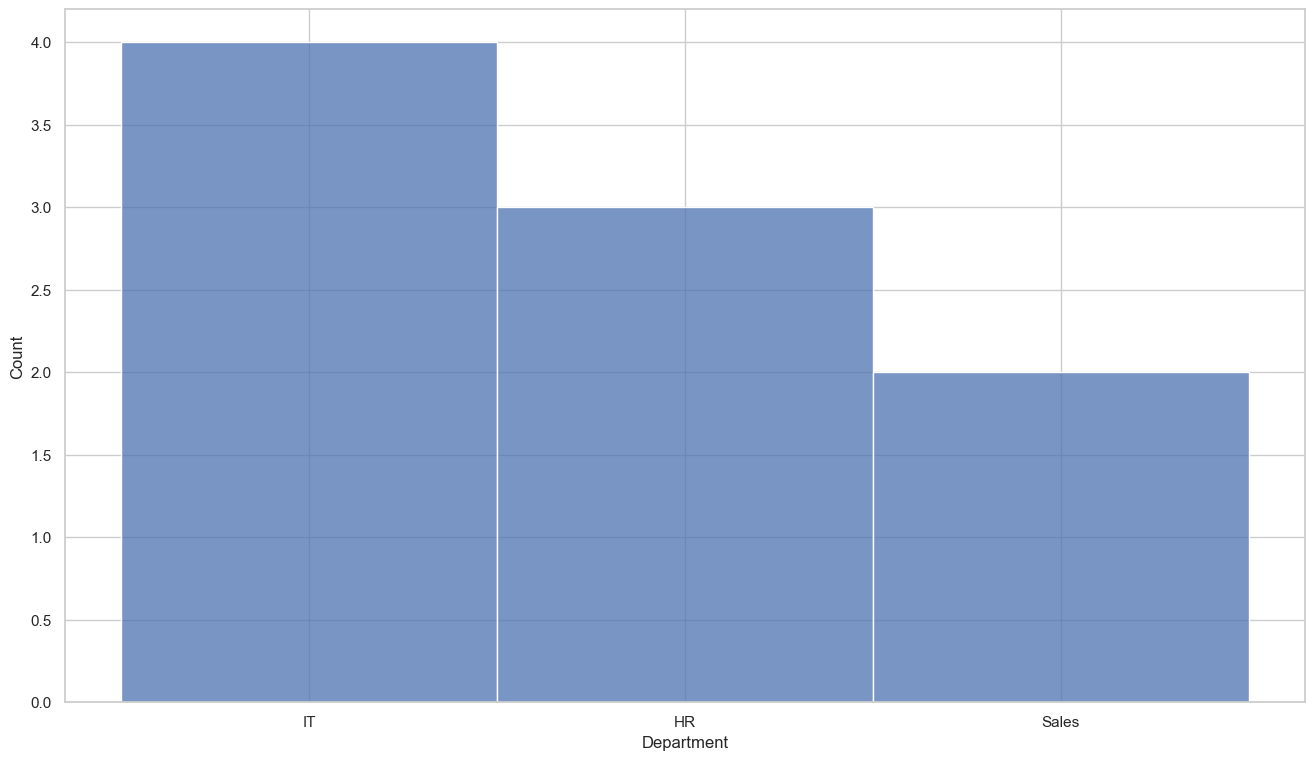

In [22]:
sns.histplot(x=employee.Department)

<Axes: xlabel='Education', ylabel='Count'>

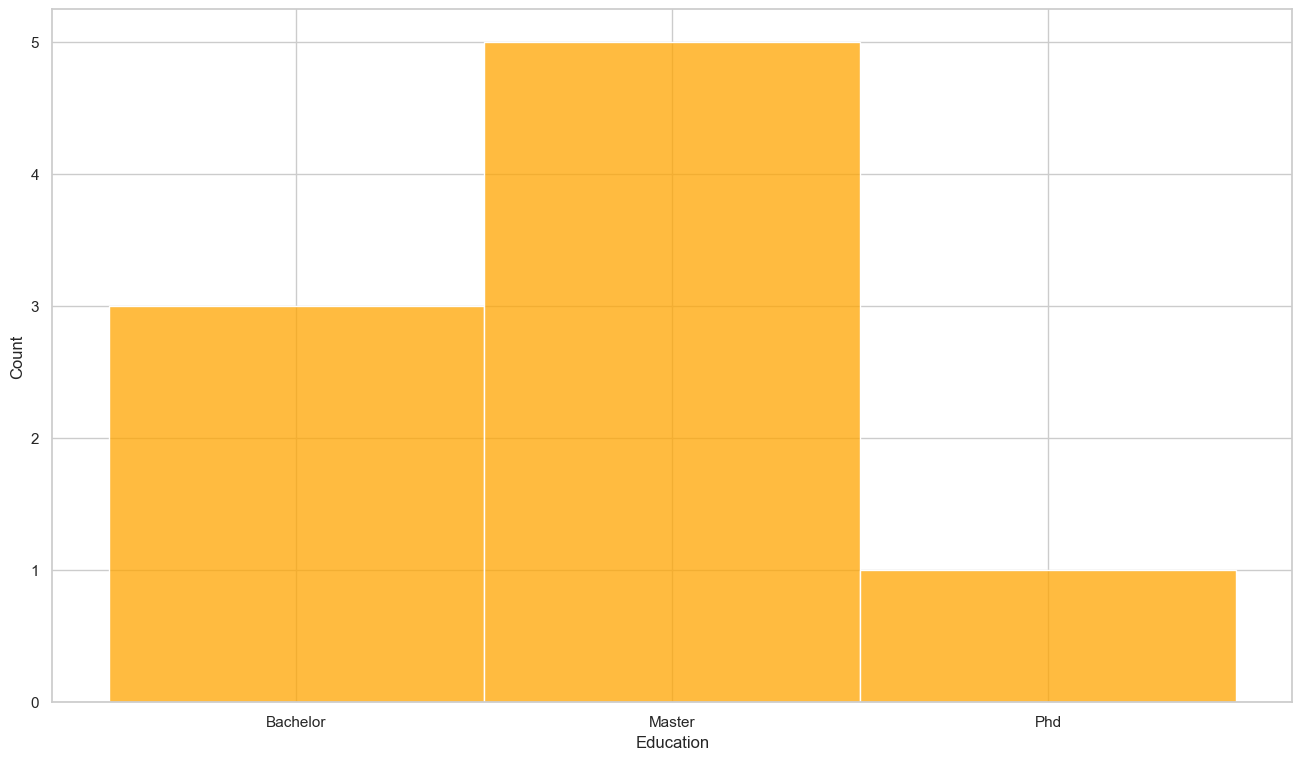

In [23]:
sns.histplot(x=employee.Education,  color="orange")

<Axes: xlabel='Gender', ylabel='Count'>

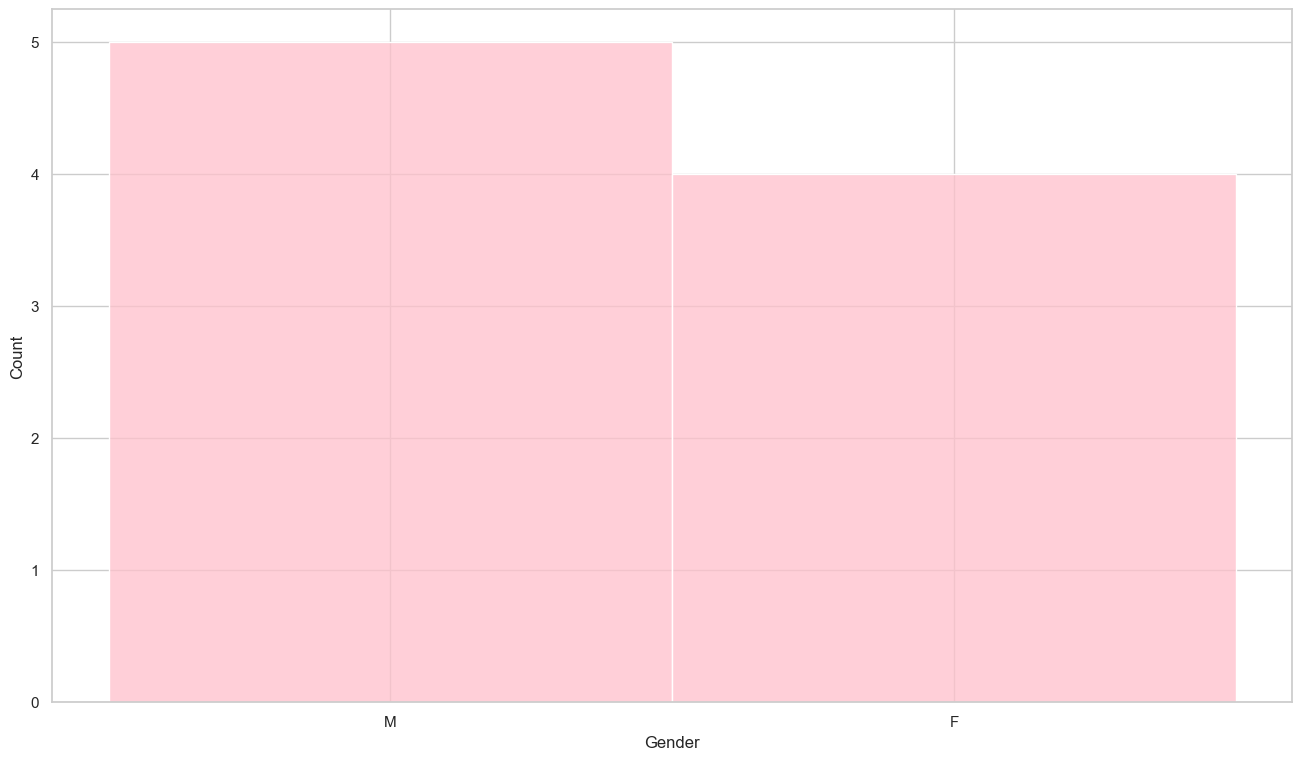

In [24]:
sns.histplot(x=employee.Gender,  color="pink")

<Axes: xlabel='Title', ylabel='Count'>

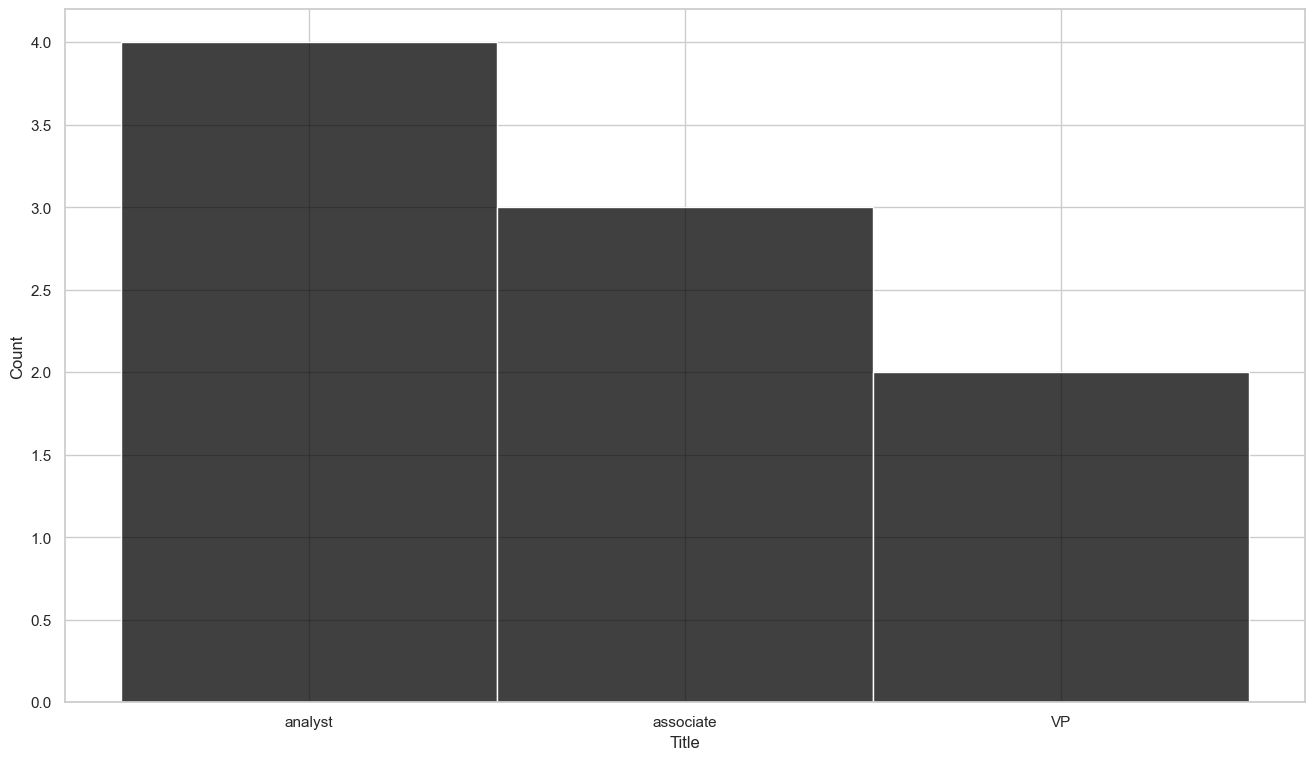

In [25]:
sns.histplot(x=employee.Title,  color="black")

<Axes: xlabel='Years', ylabel='Count'>

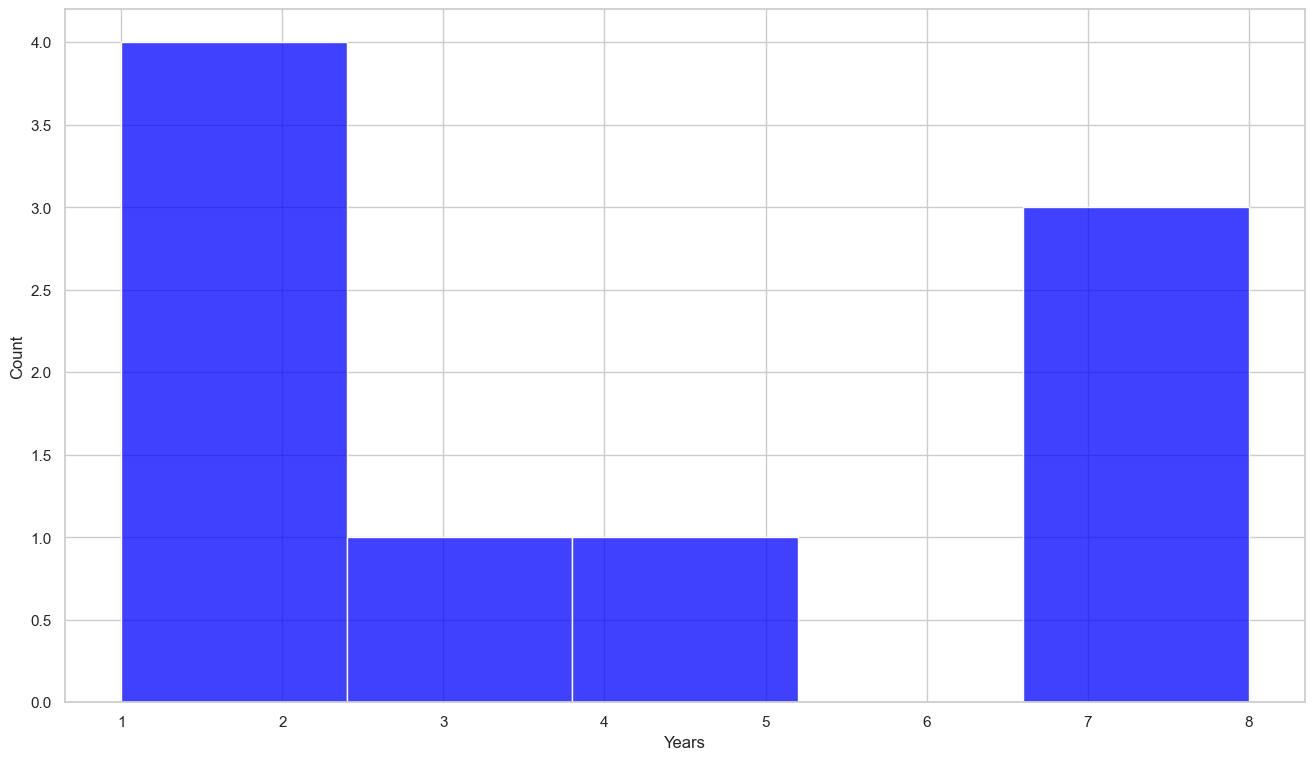

In [26]:
sns.histplot(x=employee.Years, color="blue")

<Axes: xlabel='Salary', ylabel='Count'>

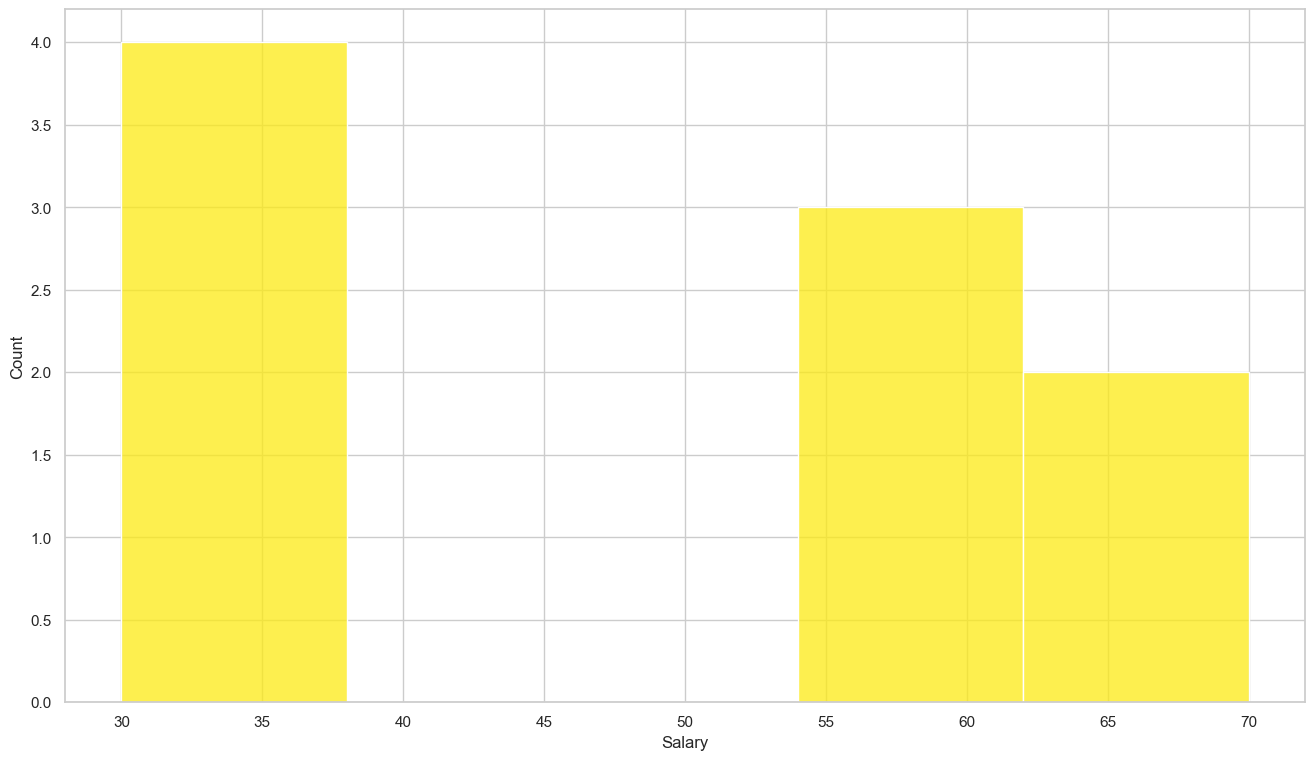

In [27]:
sns.histplot(x=employee.Salary, color="#fdea14")

#### What's the average salary in this company?

In [28]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [29]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [30]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [31]:
for i in range(len(employee["Salary"])):
    if employee["Salary"][i] == 30:
        print(employee["Name"][i])

Maria
David


#### Could you give all the information about an employee called David?

In [32]:
david_info = employee[employee['Name'] == 'David']
david_info

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [33]:
david_salary = employee.loc[employee['Name'] == 'David', 'Salary'].iloc[0]
david_salary

30

#### Print all the rows where job title is associate

In [34]:
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [35]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [36]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [37]:
selected_employees = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
selected_employees

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [38]:
avgsalary = employee.groupby('Years')['Salary'].mean()
avgsalary

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [39]:
employee.groupby('Title')['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

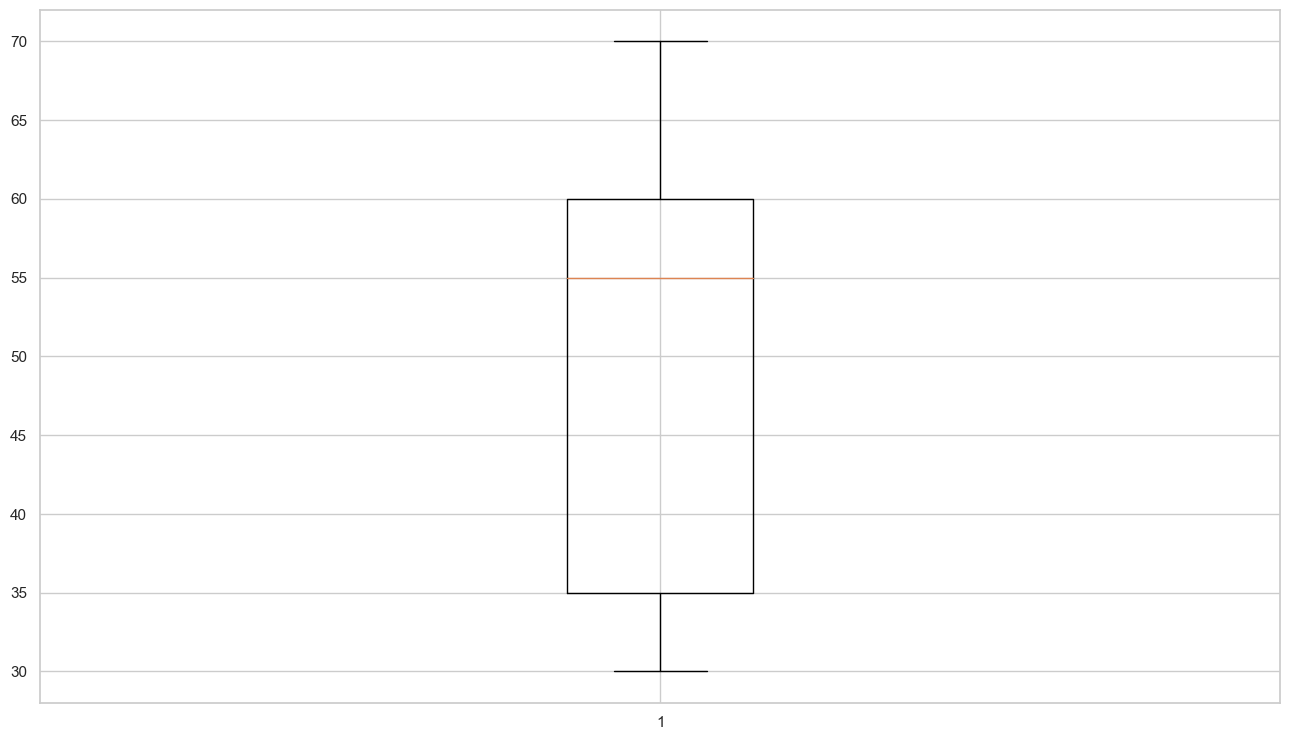

In [40]:
plt.boxplot(x="Salary", data=employee);

In [41]:
q1 = employee['Salary'].quantile(0.25)
q1

35.0

In [42]:
q3 = employee['Salary'].quantile(0.75)
q3

60.0

#### Is the mean salary per gender different?

In [43]:
employee.groupby('Gender')['Salary'].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [60]:
orders = pd.read_csv("/Users/lauurasarabia/ironhack/lab-descriptive-stats/your-code/Orders.csv")
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [61]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [ ]:
# your answer here

####  What is the average Purchase Price?

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here